In [12]:
from sys import argv, exit
import netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib
from pylab import *

In [13]:
#print '#args=',len(argv)
#print 'args: ',argv
vble = "AEROSOL"
bins = "aerosol_bin"
binedge = "bin_edges"
#  vble = "ALUMINA"
#  bins = "alumina_bin"
#  binedge = "alumina_binedges"
maxbins = 150


# times to plot in seconds:  1 minute, 1 hour, 1 day, 10 days
plottime = [60.,3600.,86400.,864000.]
linelabels = ['1 min','1 hour','1 day','10 days']
colr = ['g','c','r','b']

# plottime = [0, 60.,3600.,86400.]
# linelabels = ['Initial','1 min','1 hour','1 day']
# colr = ['k','g','b','r']


ymin = 1.e-2
ymax = 1.e09
xmin = 0.
xmax = 0.
tit = ""
legloc = "upper right"

In [14]:
# iarg=1
# while iarg < len(argv):
# #    print argv[iarg]
#     if argv[iarg] == "-ymin":
#         iarg += 1
#         ymin = float(argv[iarg])
#     elif argv[iarg] == "-ymax":
#         iarg += 1
#         ymax = float(argv[iarg])
#     elif argv[iarg] == "-xmin":
#         iarg += 1
#         xmin = float(argv[iarg])
#     elif argv[iarg] == "-xmax":
#         iarg += 1
#         xmax = float(argv[iarg])
#     elif argv[iarg] == "-legend":
#         iarg += 1
#         legloc = argv[iarg]
#         print("found legend location: ",legloc)
#     elif argv[iarg] == "-title":
#         iarg += 1
#         tit = argv[iarg]
#         print("found title: ",tit)
#     else:
#         filename = argv[iarg]
#         print("found filename: ",filename)
#     iarg += 1
    

In [23]:
filename = '/n/home12/hongwei/GC_aerosol/aer_box_Debra/src_Figure6.2b/boxmod.out'
file1 = open(filename)
ncom=0
while 1:
    line1 = file1.readline()
    if line1.find('BIN#') >= 0:
        break
    else:
        ncom += 1
print("# of comment lines is: ",ncom)
linelabel = line1.split()
print("linelabel: ", linelabel)

# of comment lines is:  7
linelabel:  ['BIN#', 'R(um)', 'R1(um)', 'R2(um)', 'dR(um)', 'dlogR(um)', 'Vol(cm^3)', 'SAD(cm^-1)']


In [24]:
nbin = 0
rad = zeros((maxbins),dtype=float)
rad1 = zeros((maxbins+1),dtype=float)
rad2 = zeros((maxbins+1),dtype=float)
dlogR = zeros((maxbins),dtype=float)
Vol = zeros((maxbins),dtype=float)
line1 = file1.readline()
while len(line1) > 1:
    sizeparm = line1.split()
    print("sizeparm:  ",sizeparm)
# in microns
    rad[nbin] = float(sizeparm[1])
# rad1, rad2 are upper and lower bin limits
    rad1[nbin] = float(sizeparm[2])
    rad2[nbin] = float(sizeparm[3])
    dlogR[nbin] = float(sizeparm[5])
# in cm^3
    Vol[nbin] = float(sizeparm[6])
# read next line
    line1 = file1.readline()
    nbin = nbin+1
    
print("Number of bin is: ",nbin)
print(' ')
print("Radius = ",rad[:nbin])
print(' ')
print("dlogR = ",dlogR[:nbin])

sizeparm:   ['1', '0.0003938', '0.0003814', '0.0004053', '0.0000239', '0.0607738', '2.55731E-22', '1.94838E-14']
sizeparm:   ['2', '0.0004184', '0.0004053', '0.0004307', '0.0000254', '0.0607738', '3.06877E-22', '2.20019E-14']
sizeparm:   ['3', '0.0004447', '0.0004307', '0.0004577', '0.0000270', '0.0607738', '3.68253E-22', '2.48455E-14']
sizeparm:   ['4', '0.0004725', '0.0004577', '0.0004864', '0.0000287', '0.0607738', '4.41903E-22', '2.80566E-14']
sizeparm:   ['5', '0.0005021', '0.0004864', '0.0005169', '0.0000305', '0.0607738', '5.30284E-22', '3.16827E-14']
sizeparm:   ['6', '0.0005336', '0.0005169', '0.0005493', '0.0000324', '0.0607738', '6.36341E-22', '3.57775E-14']
sizeparm:   ['7', '0.0005670', '0.0005493', '0.0005837', '0.0000344', '0.0607738', '7.63609E-22', '4.04015E-14']
sizeparm:   ['8', '0.0006025', '0.0005837', '0.0006203', '0.0000366', '0.0607738', '9.16331E-22', '4.56232E-14']
sizeparm:   ['9', '0.0006403', '0.0006203', '0.0006591', '0.0000389', '0.0607738', '1.09960E-21'

In [25]:
while 1:
    line1 = file1.readline()
    if line1.find('Time(s)') >= 0: 
        break
print("last line read:  ",line1)


data = np.genfromtxt(file1)
print("data dim 1:  ",len(data[:,0]))
print("data dim 2:  ",len(data[0,:]))
ntimes = len(data[:,0])
time = zeros((ntimes),dtype=float)
H2SO4 = zeros((ntimes),dtype=float)
NuclRt = zeros((ntimes),dtype=float)
CondRt = zeros((ntimes),dtype=float)
Dist = zeros((ntimes,nbin),dtype=float)
time = data[:,0]
H2SO4 = data[:,1]
NuclRt = data[:,2]
CondRt = data[:,3]
Dist = data[:,4:]
print("Read data with ",ntimes," times")
print("Read data with ",len(Dist[0,:])," bins")
print("Times: ",time)

last line read:    Time(s)     H2SO4   Nucl_Rt   Cond_Rt   Bins:

data dim 1:   1440
data dim 2:   154
Read data with  1440  times
Read data with  150  bins
Times:  [0.000e+00 3.000e+00 6.000e+00 ... 8.568e+05 8.604e+05 8.640e+05]


x= [3.9380000e-04 4.1840000e-04 4.4470000e-04 4.7250000e-04 5.0210000e-04
 5.3360000e-04 5.6700000e-04 6.0250000e-04 6.4030000e-04 6.8040000e-04
 7.2310000e-04 7.6840000e-04 8.1650000e-04 8.6770000e-04 9.2200000e-04
 9.7980000e-04 1.0412000e-03 1.1064000e-03 1.1758000e-03 1.2494000e-03
 1.3277000e-03 1.4109000e-03 1.4993000e-03 1.5933000e-03 1.6931000e-03
 1.7992000e-03 1.9119000e-03 2.0317000e-03 2.1590000e-03 2.2943000e-03
 2.4381000e-03 2.5908000e-03 2.7532000e-03 2.9257000e-03 3.1090000e-03
 3.3038000e-03 3.5108000e-03 3.7308000e-03 3.9646000e-03 4.2130000e-03
 4.4769000e-03 4.7575000e-03 5.0556000e-03 5.3723000e-03 5.7090000e-03
 6.0667000e-03 6.4468000e-03 6.8507000e-03 7.2800000e-03 7.7362000e-03
 8.2209000e-03 8.7360000e-03 9.2834000e-03 9.8651000e-03 1.0483200e-02
 1.1140100e-02 1.1838100e-02 1.2579800e-02 1.3368100e-02 1.4205700e-02
 1.5095800e-02 1.6041700e-02 1.7046800e-02 1.8115000e-02 1.9250000e-02
 2.0456200e-02 2.1738000e-02 2.3100000e-02 2.4547500e-02 2.6085600e-02
 2.

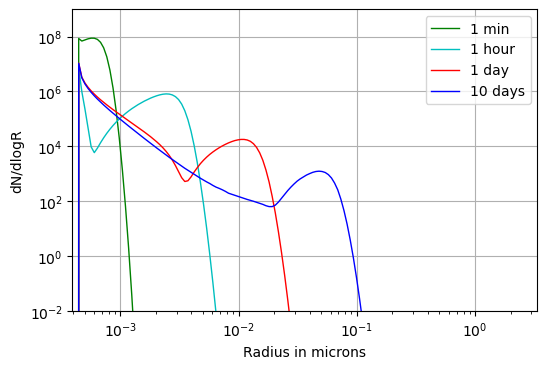

<Figure size 432x288 with 0 Axes>

In [26]:
#matplotlib.use('agg')
figure(dpi=100)
x = rad
print("x=",x)
print("len(x)=",len(x))
for itt,iday in enumerate(plottime):
#     print("looking to plot time ",iday)
    for it in range(ntimes):
        if iday == time[it]:
            print('Plotting for time ',iday,' seconds')
            y=Dist[it,:]/dlogR[:]
            print('SHW:', np.max(y))
#             print('y=',y)
#             print("len(y)=",len(y))
            plot(x,y,color=colr[itt],label=linelabels[itt],linewidth=1)

grid()
loglog()
if xmin == 0: xmin = rad[0]
if xmax == 0: xmax = rad[-1]
axlimits = [xmin,xmax,ymin,ymax]
axis(axlimits)
legend(loc=legloc)
ylabel("dN/dlogR")
xlabel("Radius in microns")
title(tit)
show()
savefig('aerodist.eps')
savefig('aerodist.pdf')
